In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt

#from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

## Prepare target and features

In [2]:
file_path = '{}/nem-data/nemde_clean/df_DUID_CO2_mean.pkl'.format(os.environ['HOME'])
df_DUID_CO2_price = pd.read_pickle(file_path)
df_DUID_CO2_price.head()

,Price,CO2E_EMISSIONS_FACTOR
2019-08-01 03:55:00,79.52391,0.380340
2019-08-01 03:50:00,79.17710,0.456409
2019-08-01 03:45:00,85.14416,0.573436
2019-08-01 03:40:00,84.78689,0.573436
2019-08-01 03:35:00,84.78346,0.573436


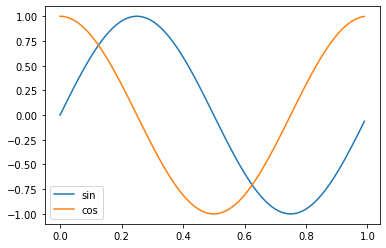

In [413]:
X1 = np.linspace(0,1,50)
X = np.arange(0,1,0.01)

y_sin = np.sin(2 * np.pi*X)
y_cos = np.cos(2 * np.pi*X)

sns.lineplot(X,y_sin,label="sin")
sns.lineplot(X,y_cos,label="cos")

In [414]:
df_DUID_CO2_price["minute"] = df_DUID_CO2_price.index.minute

df_DUID_CO2_price["hour"] = df_DUID_CO2_price.index.hour
df_DUID_CO2_price["month"] = df_DUID_CO2_price.index.month

df_DUID_CO2_price['minute_sin'] = np.sin(2 * np.pi * df_DUID_CO2_price['minute']/60.0)
df_DUID_CO2_price['minute_cos'] = np.cos(2 * np.pi * df_DUID_CO2_price['minute']/60.0)

df_DUID_CO2_price['hour_sin'] = np.sin(2 * np.pi * df_DUID_CO2_price['hour']/24.0)
df_DUID_CO2_price['hour_cos'] = np.cos(2 * np.pi * df_DUID_CO2_price['hour']/24.0)

df_DUID_CO2_price['month_sin'] = np.sin(2 * np.pi * df_DUID_CO2_price['month']/12.0)
df_DUID_CO2_price['month_cos'] = np.cos(2 * np.pi * df_DUID_CO2_price['month']/12.0)

df_DUID_CO2_price.drop(columns=["Price", "CO2_group", "minute", "hour", "month"], inplace=True)

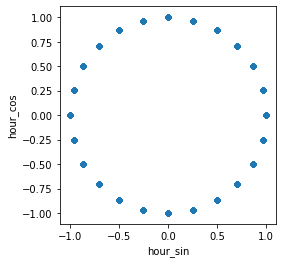

In [415]:
df_DUID_CO2_price.plot.scatter('hour_sin', 'hour_cos').set_aspect('equal')

In [416]:
print(df_DUID_CO2_price.shape)
df_DUID_CO2_price.head()

(911171, 7)


,CO2E_EMISSIONS_FACTOR,minute_sin,minute_cos,hour_sin,hour_cos,month_sin,month_cos
PeriodID,,,,,,,
2018-07-31 23:55:00,0.910143,-0.500000,8.660254e-01,-0.258819,0.965926,-0.5,-0.866025
2018-07-31 23:50:00,0.728114,-0.866025,5.000000e-01,-0.258819,0.965926,-0.5,-0.866025
2018-07-31 23:45:00,0.910143,-1.000000,-1.836970e-16,-0.258819,0.965926,-0.5,-0.866025
2018-07-31 23:40:00,0.908305,-0.866025,-5.000000e-01,-0.258819,0.965926,-0.5,-0.866025
2018-07-31 23:35:00,0.971761,-0.500000,-8.660254e-01,-0.258819,0.965926,-0.5,-0.866025


In [417]:
#fig1 = sns.scatterplot(df_DUID_CO2_price.index[:1300], df_DUID_CO2_price.hour_sin.iloc[:1300])
#fig2 = sns.scatterplot(df_DUID_CO2_price.index[:1300], df_DUID_CO2_price.hour_cos.iloc[:1300])
#fig1.set_xlim(df_DUID_CO2_price.index[:1300].min(), df_DUID_CO2_price.index[:1300].max())

In [418]:
data_sub = df_DUID_CO2_price[(df_DUID_CO2_price.index < dt.datetime(2018,6,1)) & (df_DUID_CO2_price.index > dt.datetime(2017,6,1))]
data_sub.head()

,CO2E_EMISSIONS_FACTOR,minute_sin,minute_cos,hour_sin,hour_cos,month_sin,month_cos
PeriodID,,,,,,,
2018-05-31 23:55:00,0.605537,-0.500000,8.660254e-01,-0.258819,0.965926,0.5,-0.866025
2018-05-31 23:50:00,0.912643,-0.866025,5.000000e-01,-0.258819,0.965926,0.5,-0.866025
2018-05-31 23:45:00,0.908518,-1.000000,-1.836970e-16,-0.258819,0.965926,0.5,-0.866025
2018-05-31 23:40:00,0.608429,-0.866025,-5.000000e-01,-0.258819,0.965926,0.5,-0.866025
2018-05-31 23:35:00,0.694855,-0.500000,-8.660254e-01,-0.258819,0.965926,0.5,-0.866025


In [419]:
print(data_sub.shape)
print(data_sub.index.max())
print(data_sub.index.min())

(104416, 7)
2018-05-31 23:55:00
2017-06-01 00:05:00


In [420]:
import xgboost as xgb

In [421]:
y = data_sub["CO2E_EMISSIONS_FACTOR"]
X = data_sub[["minute_sin", "minute_cos", "hour_sin", "hour_cos", "month_sin", "month_cos"]]

In [422]:
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=101)

In [423]:
data_sub.head()

,CO2E_EMISSIONS_FACTOR,minute_sin,minute_cos,hour_sin,hour_cos,month_sin,month_cos
PeriodID,,,,,,,
2018-05-31 23:55:00,0.605537,-0.500000,8.660254e-01,-0.258819,0.965926,0.5,-0.866025
2018-05-31 23:50:00,0.912643,-0.866025,5.000000e-01,-0.258819,0.965926,0.5,-0.866025
2018-05-31 23:45:00,0.908518,-1.000000,-1.836970e-16,-0.258819,0.965926,0.5,-0.866025
2018-05-31 23:40:00,0.608429,-0.866025,-5.000000e-01,-0.258819,0.965926,0.5,-0.866025
2018-05-31 23:35:00,0.694855,-0.500000,-8.660254e-01,-0.258819,0.965926,0.5,-0.866025


In [424]:
print(data_sub.shape)
k = int(data_sub.shape[0])
k

(104416, 7)


104416

In [425]:
k = int(df_DUID_CO2_price.shape[0] * 0.2)
data_train = df_DUID_CO2_price.iloc[k:,:]
data_test = df_DUID_CO2_price.iloc[:k,:]

In [426]:
k

182234

In [427]:
print(data_train.index.max())
print(data_train.index.min())

print(data_test.index.min())
print(data_test.index.max())

2016-10-03 18:10:00
2009-07-01 04:00:00
2016-10-03 18:15:00
2018-07-31 23:55:00


In [428]:
X_train = data_train.loc[:,["minute_sin", "minute_cos", "hour_sin", "hour_cos", "month_sin", "month_cos"]]
y_train = data_train["CO2E_EMISSIONS_FACTOR"]

X_test = data_test.loc[:,["minute_sin", "minute_cos", "hour_sin", "hour_cos", "month_sin", "month_cos"]]
y_test = data_test["CO2E_EMISSIONS_FACTOR"]

In [429]:
y_test

PeriodID
2018-07-31 23:55:00    0.910143
2018-07-31 23:50:00    0.728114
2018-07-31 23:45:00    0.910143
2018-07-31 23:40:00    0.908305
2018-07-31 23:35:00    0.971761
                         ...   
2016-10-03 18:35:00    0.681150
2016-10-03 18:30:00    0.681150
2016-10-03 18:25:00    0.708560
2016-10-03 18:20:00    0.681150
2016-10-03 18:15:00    0.708560
Name: CO2E_EMISSIONS_FACTOR, Length: 182234, dtype: float64

In [430]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

/home/bastian/Environment/DSR_portfolio/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/bastian/Environment/DSR_portfolio/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [431]:
params = {
        'verbosity': 1,
        'nthread': 7,
        'eta': 0.3, # learning rate, 0.3
        'max_depth': 5, # 6
        'num_round': 1250
    }

num_round = params.pop('num_round')

In [432]:
model = xgb.train(params, dtrain, num_round)

In [433]:
pred = model.predict(dtest)

In [434]:
print(y_test.mean())
print(y_test.min())
print(y_test.max())

0.6257243284116175
0.0
1.4918


In [435]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
np.sqrt(mse(y_test, pred)/y_test.mean())

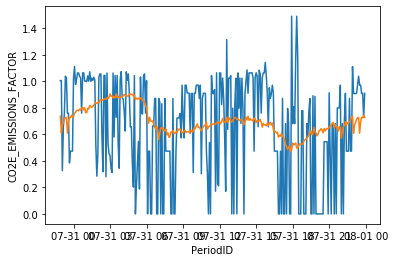

In [398]:
sns.lineplot(y_test.index[:300],y_test.iloc[:300])
sns.lineplot(y_test.index[:300],pred[:300])

In [399]:
comb = pd.DataFrame(index=y_test.index, data={"y_test":y_test.values, "pred":pred})

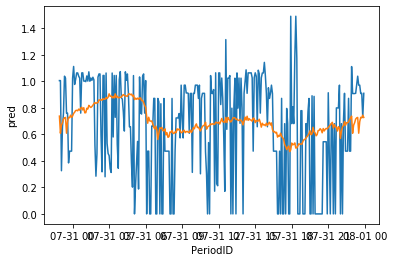

In [400]:
sns.lineplot(comb.index[:300],comb.iloc[:300].loc[:,"y_test"])
sns.lineplot(comb.index[:300],comb.iloc[:300].loc[:,"pred"])

In [401]:
comb.corr()

,y_test,pred
y_test,1.000000,0.287231
pred,0.287231,1.000000


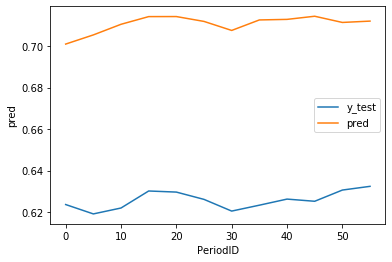

In [406]:
comb_group_minute = comb.groupby(comb.index.minute).mean()

sns.lineplot(comb_group_minute.index,comb_group_minute.loc[:,"y_test"], label="y_test")
sns.lineplot(comb_group_minute.index,comb_group_minute.loc[:,"pred"], label="pred")

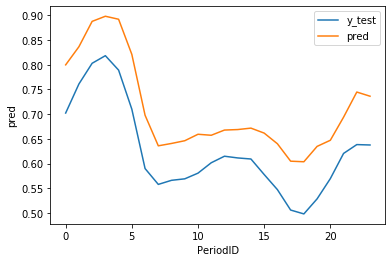

In [409]:
comb_group_hour = comb.groupby(comb.index.hour).mean()

sns.lineplot(comb_group_hour.index,comb_group_hour.loc[:,"y_test"], label="y_test")
sns.lineplot(comb_group_hour.index,comb_group_hour.loc[:,"pred"], label="pred")

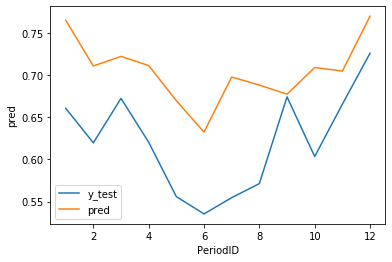

In [410]:
comb_group_month = comb.groupby(comb.index.month).mean()

sns.lineplot(comb_group_month.index,comb_group_month.loc[:,"y_test"], label="y_test")
sns.lineplot(comb_group_month.index,comb_group_month.loc[:,"pred"], label="pred")